# Análisis exploratorio de datos

## Unidad 9: Análisis exploratorio de series temporales

**Índice**   
1. [¿Qué es una serie temporal?](#id1)
2. [Visualización de series temporales](#id2)
3. [Conversión de tipo de fecha](#id3)
4. [Detección y gestión de datos nulos y atípicos en series temporales](#id4)
5. [Suavizado de series temporales](#id5)

### 1. ¿Qué es una serie temporal? <a name="id1"></a>

#### 1.1 Introducción

Una serie temporal se define como una colección de observaciones o medidas de una variable recogidas secuencialmente en el tiempo. Su análisis permite identificar y modelar patrones temporales y tendencias.

En las series temporales, la característica esencial radica en que las observaciones consecutivas no son independientes, y, por lo tanto, cualquier análisis debe considerar la secuencia temporal de estas observaciones.

Las series temporales son presentes en multitud de disciplinas (economía, salud, ingeniería, meteorología, etc), y su estudio es muy demandado en las empresas debido a sus múltiples aplicaciones, por ejemplo, en la previsión del tiempo, análisis financiero, predicción de ventas, control de procesos, vigilancia epidemiológica, entre otras.

Se distinguen dos objetivos principales:

**Descripción**

Cuando se analiza una serie temporal, el paso inicial es visualizarla y calcular las medidas descriptivas básicas. En este contexto, es importante tener en cuenta:
- La presencia de tendencias en los datos (ascendente, descendente).
- Si hay estacionalidad (*seasonality*) en los datos.
- La identificación de posibles valores atípicos o observaciones inusuales.

**Predicción**

En este caso, el objetivo es usar la información del pasado para poder predecir los valores futuros.



#### 1.2 Componentes de una serie temporal

Una serie temporal se puede descomponer en distintas componentes básicas:

- Tendencia: representa la dirección general de la serie temporal a lo largo del tiempo. Puede ser ascendente, descendente o seguir otro patrón específico.

- Estacionalidad: refleja patrones que se repiten a intervalos regulares dentro de un período específico (semanal, mensual, anual, etc). Por ejemplo, las ventas de medicinas para la tos son más altas en otoño e invierno que en verano.

- Componente Aleatoria o ruido: Una vez identificados los componentes anteriores y después de haberlos eliminado, quedan unos valores que son aleatorios (ruido), que contribuyen a la variabilidad de la serie temporal.

La descomposición de una serie temporal en estas componentes ayuda a entender e interpretar mejor los datos y facilita su modelización y predicción.

### 2. Visualización de series temporales <a name="id2"></a>


La visualización de series temporales es fundamental para entender patrones (estacionalidad), identificar tendencias, y detectar eventos significativos a lo largo del tiempo.

Hay multitud de gráficos que se pueden usar, pero destacan especialmente los siguientes:

- Gráfico de Líneas Temporales:  se representa la serie temporal usando un gráfico de líneas donde el eje x muestra el tiempo y el eje y muestra el valor de la serie.

- Gráfico de Barras Temporales: se muestran las observaciones en el tiempo con barras, en vez de líneas. Permite identificar y resaltar patrones estacionales o variaciones/outliers.

- Gráfico de Áreas Temporales: similar al gráfico de líneas pero el área bajo la línea se colorea. Esta representación es útil para mostrar cómo contribuyen diferentes partes a la serie en un momento temporal concreto.

¡Vamos a ver unos ejemplos en el código!


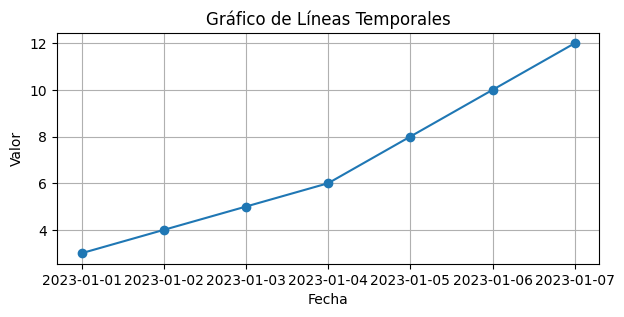

In [118]:
# Gráfico de Líneas Temporales

import matplotlib.pyplot as plt
import pandas as pd

# Creamos una serie temporal
datos = pd.Series([3, 4, 5, 6, 8, 10, 12],
                  index=pd.date_range(start='2023-01-01', periods=7))

# Especificamos las características del gráfico
plt.figure(figsize=(7, 3))
plt.plot(datos.index, datos.values, marker='o', linestyle='-')
plt.title('Gráfico de Líneas Temporales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


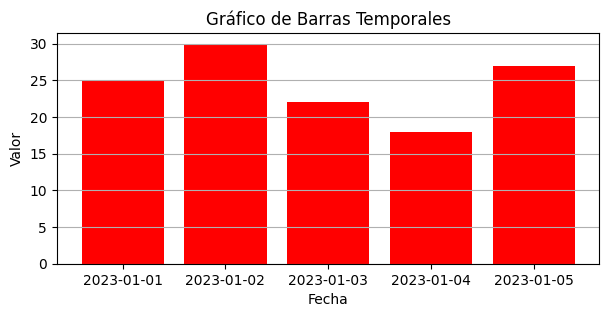

In [119]:
# Gráfico de Barras Temporales

# Creamos unos datos mensuales
datos_mensuales = pd.Series(
    [25, 30, 22, 18, 27],
    index=pd.date_range(start='2023-01-01', periods=5))

# Especificamos las características del gráfico
plt.figure(figsize=(7, 3))
plt.bar(datos_mensuales.index, datos_mensuales.values, color='red')
plt.title('Gráfico de Barras Temporales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(axis='y')
plt.show()


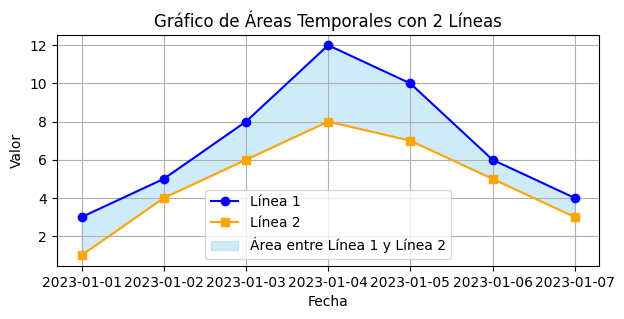

In [120]:
# Gráfico de Áreas Temporales

# Creamos 2 series temporales
fechas = pd.date_range(start='2023-01-01', periods=7)
linea1 = pd.Series([3, 5, 8, 12, 10, 6, 4], index=fechas)
linea2 = pd.Series([1, 4, 6, 8, 7, 5, 3], index=fechas)

# Hacemos el gráfico de las dos líneas
plt.figure(figsize=(7, 3))
plt.plot(linea1.index, linea1.values,
         label='Línea 1', marker='o',
         linestyle='-', color='blue')
plt.plot(linea2.index, linea2.values,
         label='Línea 2', marker='s',
         linestyle='-', color='orange')

# Coloreamos el area entre las líneas
plt.fill_between(linea1.index, linea1.values, linea2.values,
                 color='skyblue', alpha=0.4,
                 label='Área entre Línea 1 y Línea 2')

# Especificamos las características del gráfico
plt.title('Gráfico de Áreas Temporales con 2 Líneas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()



Ahora vamos a ver ejemplos de series temporales con distinta tendencia.

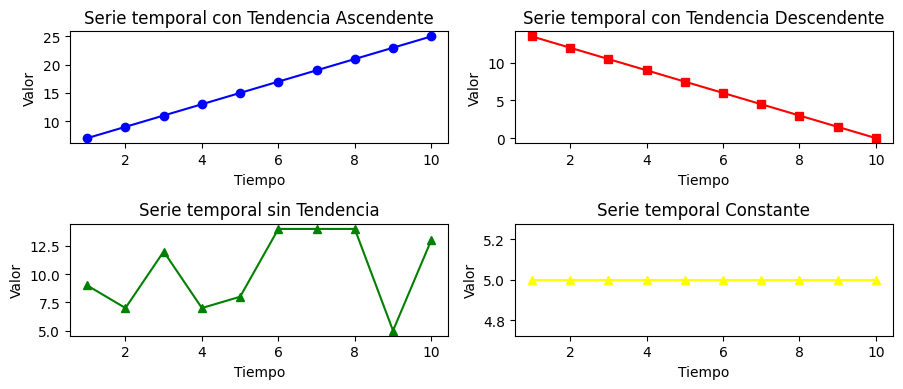

In [121]:
# Ejemplos tendencia

import matplotlib.pyplot as plt
import numpy as np

# Generamos 4 series temporales con distinta tendencia
tiempo = np.arange(1, 11)
linea_ascendente = 2 * tiempo + 5
linea_descendente = -1.5 * tiempo + 15
linea_sin_tendencia = np.random.randint(5, 15, size=10)
linea_constante = np.ones(10)*5

# Creamos el subplot con cuatro series temporales
fig, axs = plt.subplots(2, 2, figsize=(9, 4))

# Serie temporal con tendencia ascendente
axs[0][0].plot(tiempo, linea_ascendente,
               marker='o', linestyle='-', color='blue')
axs[0][0].set_title('Serie temporal con Tendencia Ascendente')
axs[0][0].set_xlabel('Tiempo')
axs[0][0].set_ylabel('Valor')

# Serie temporal con tendencia descendente
axs[0][1].plot(tiempo, linea_descendente,
               marker='s', linestyle='-', color='red')
axs[0][1].set_title('Serie temporal con Tendencia Descendente')
axs[0][1].set_xlabel('Tiempo')
axs[0][1].set_ylabel('Valor')

# Serie temporal sin tendencia
axs[1][0].plot(tiempo, linea_sin_tendencia,
               marker='^', linestyle='-', color='green')
axs[1][0].set_title('Serie temporal sin Tendencia')
axs[1][0].set_xlabel('Tiempo')
axs[1][0].set_ylabel('Valor')

# Serie temporal constante
axs[1][1].plot(tiempo, linea_constante,
               marker='^', linestyle='-', color='yellow')
axs[1][1].set_title('Serie temporal Constante')
axs[1][1].set_xlabel('Tiempo')
axs[1][1].set_ylabel('Valor')

# Ajustamos el diseño y mostramos gráfico
plt.tight_layout()
plt.show()


Una manera sencilla de calcular la tendencia es ajustar un polinomio de primer grado:

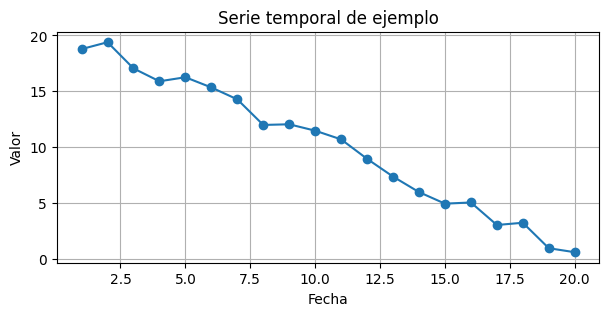

In [122]:
# Creamos fechas para la serie temporal
# con 20 valores
tiempo = np.arange(1, 21)

# Generamos valores con tendencia ascendente
# Valores linealmente descendente de 20 a 0 con ruido
valores = np.linspace(20, 0, num=20) + np.random.normal(0, 0.8, size=20)

# Creamos el DataFrame con fechas y valores
ts_df = pd.DataFrame({'Fecha': tiempo, 'Valor': valores})

# Especificamos las características del gráfico
plt.figure(figsize=(7, 3))
plt.plot(ts_df.Fecha, ts_df.Valor, marker='o', linestyle='-')
plt.title('Serie temporal de ejemplo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


In [123]:
# Usamos la función polyfit, que ajusta un polinomio a los datos
# En este caso, usamos una función de grado 1
coefficients, _, _, _, _ = np.polyfit(tiempo,valores,1,full=True)
print('Slope ' + str(coefficients[0]))

Slope -1.0064611124187335


Un polinomio de primer grado está caracterizado por dos parámetros: la pendiente y la ordenada en el origen. Cuando la pendiente obtenida mediante `polyfit()` es diferente de cero, podemos inferir la existencia de una tendencia. Los resultados de `polyfit()` incluyen varios valores, pero solo necesitamos los coeficientes, presentados como una lista que contiene la pendiente y la ordenada en el origen.

En este ejemplo, podemos ver una pendiente negativa (-1.03), por lo tanto, esta time series tiene una tendencia negativa.

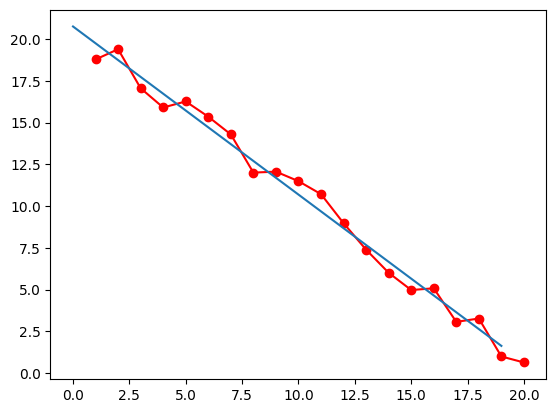

In [124]:
# Mostramos la serie temporal descendente con la línea del fit
plt.plot(tiempo, valores, marker='o', linestyle='-', color='red')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(valores))])
plt.show()

También podemos diferenciar las series temporales según su estacionalidad.

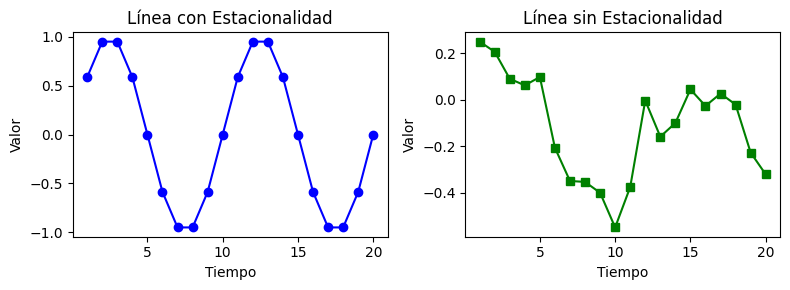

In [125]:
# Ejemplos de estacionalidad

import matplotlib.pyplot as plt
import numpy as np

# Generaramos dos líneas temporales, con y sin estacionalidad
tiempo = np.arange(1, 21)
linea_con_estacionalidad = np.sin(2 * np.pi * tiempo / 10)
linea_sin_estacionalidad = np.cumsum(np.random.normal(0, 0.2, size=20))

# Creamos subplot con dos líneas
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Línea con estacionalidad
axs[0].plot(tiempo, linea_con_estacionalidad, marker='o', linestyle='-', color='blue')
axs[0].set_title('Línea con Estacionalidad')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Valor')

# Línea sin estacionalidad
axs[1].plot(tiempo, linea_sin_estacionalidad, marker='s', linestyle='-', color='green')
axs[1].set_title('Línea sin Estacionalidad')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Valor')

# Ajustamos el diseño y mostramos gráfico
plt.tight_layout()
plt.show()


Finalmente, vamos a ver el efecto del ruido/valor aleatorio en los datos:

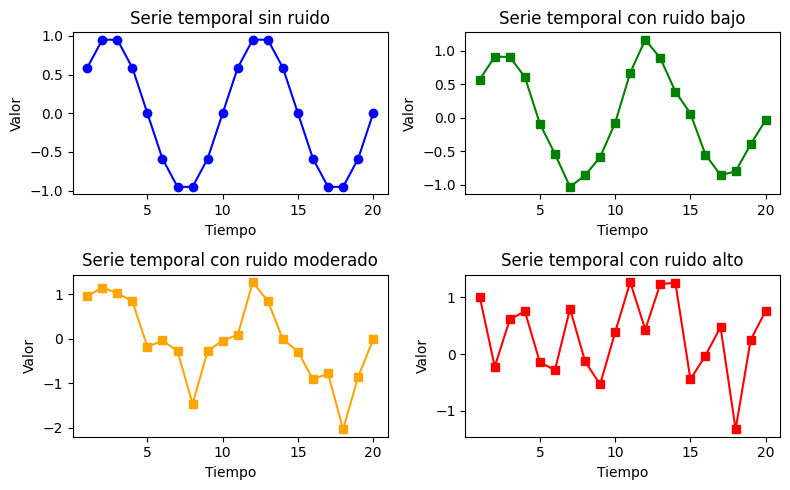

In [126]:
# Ejemplo ruido

# Generaramos dos líneas temporales
# con y sin ruido
tiempo = np.arange(1, 21)
linea_sin_ruido = np.sin(2 * np.pi * tiempo / 10)
linea_con_ruido_bajo = np.sin(2 * np.pi * tiempo / 10) + np.random.normal(0, 0.1, size=20)
linea_con_ruido_moderado = np.sin(2 * np.pi * tiempo / 10) + np.random.normal(0, 0.4, size=20)
linea_con_ruido_alto = np.sin(2 * np.pi * tiempo / 10) + np.random.normal(0, 0.8, size=20)

# Creamos subplot con cuatro series temporales
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

# Línea sin ruido
axs[0][0].plot(tiempo, linea_sin_ruido, marker='o', linestyle='-', color='blue')
axs[0][0].set_title('Serie temporal sin ruido')
axs[0][0].set_xlabel('Tiempo')
axs[0][0].set_ylabel('Valor')

# Línea con ruido bajo
axs[0][1].plot(tiempo, linea_con_ruido_bajo, marker='s', linestyle='-', color='green')
axs[0][1].set_title('Serie temporal con ruido bajo')
axs[0][1].set_xlabel('Tiempo')
axs[0][1].set_ylabel('Valor')

# Línea con ruido moderado
axs[1][0].plot(tiempo, linea_con_ruido_moderado, marker='s', linestyle='-', color='orange')
axs[1][0].set_title('Serie temporal con ruido moderado')
axs[1][0].set_xlabel('Tiempo')
axs[1][0].set_ylabel('Valor')

# Línea con ruido alto
axs[1][1].plot(tiempo, linea_con_ruido_alto, marker='s', linestyle='-', color='red')
axs[1][1].set_title('Serie temporal con ruido alto')
axs[1][1].set_xlabel('Tiempo')
axs[1][1].set_ylabel('Valor')

# Ajustamos el diseño y mostramos gráfico
plt.tight_layout()
plt.show()

In [127]:
linea_con_estacionalidad

array([ 5.87785252e-01,  9.51056516e-01,  9.51056516e-01,  5.87785252e-01,
        1.22464680e-16, -5.87785252e-01, -9.51056516e-01, -9.51056516e-01,
       -5.87785252e-01, -2.44929360e-16,  5.87785252e-01,  9.51056516e-01,
        9.51056516e-01,  5.87785252e-01,  3.67394040e-16, -5.87785252e-01,
       -9.51056516e-01, -9.51056516e-01, -5.87785252e-01, -4.89858720e-16])

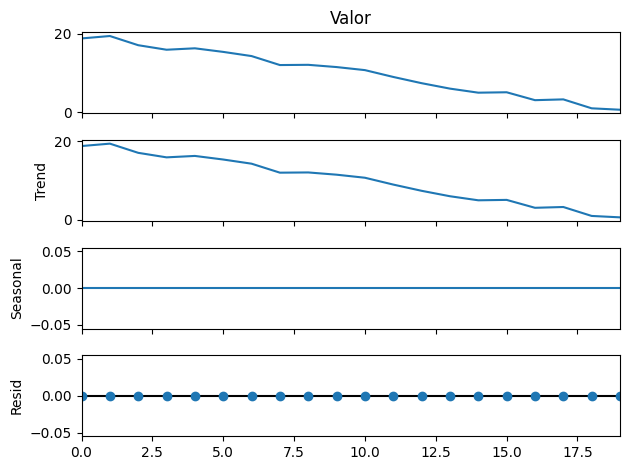

In [128]:
# Si queremos hacer un análisis global de la serie temporal
# podemos descomponerla en las 3 componentes básicas

# Cargamos la función seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicamos la descomposición estacional
resultados = seasonal_decompose(
    ts_df.Valor, period=1)

# Mostramos los resultados
resultados.plot()
plt.show()

### 3. Gestión de tipo fecha <a name="id3"></a>

La gestión de datos de tipo fecha y hora (datetime) es esencial en el análisis de series temporales y datos que involucran información temporal. En Python, el módulo **datetime** proporciona las funcionalidades para trabajar con fechas y horas.

Vamos a ver ejemplos de cómo usar este módulo.

In [129]:
# Creación de Objetos datetime

# Se pueden crear objetos datetime para representar fechas y horas
# usando la clase datetime del módulo datetime.
from datetime import datetime

# Especificamos fecha y hora actual
fecha_actual = datetime.now()
print("Fecha y hora actual:", fecha_actual)

# Creamos un objeto datetime específico
fecha_especifica = datetime(2025, 12, 1, 15, 30, 0)
print("Fecha y hora específica:", fecha_especifica)


Fecha y hora actual: 2025-11-29 16:16:15.246706
Fecha y hora específica: 2025-12-01 15:30:00


In [130]:
# Formateo y gestión de datos tipo fecha

# Se puede formatear objetos datetime como cadenas de texto y viceversa.
# El método strftime se utiliza para formatear
# y la función strptime se usa para parsear cadenas de fecha

# Parsear una fecha significa convertir una cadena de texto
# que representa una fecha en un objeto de fecha en python.
# Formatear una fecha significa representar un objeto de fecha
# en formato de cadena de texto.

# Formateamos un datetime como cadena
fecha_formateada = fecha_actual.strftime("%Y-%m-%d %H:%M:%S")
print("Fecha formateada:", fecha_formateada)
print("Tipo de la variable:", type(fecha_formateada))

# Parseamos una cadena de fecha
cadena_fecha = "12/01/2025"
fecha_parseada = datetime.strptime(cadena_fecha, "%d/%m/%Y")
print("Fecha parseada:", fecha_parseada)
print("Tipo de la variable:", type(fecha_parseada))


Fecha formateada: 2025-11-29 16:16:15
Tipo de la variable: <class 'str'>
Fecha parseada: 2025-01-12 00:00:00
Tipo de la variable: <class 'datetime.datetime'>


In [131]:
# Operaciones con datetime

# Se pueden realizar operaciones aritméticas
# y comparaciones con objetos datetime

# Calculamos la diferencia entre dos fechas
diferencia = fecha_especifica - fecha_actual
print("Diferencia entre fechas:", diferencia)

# Verificamos si una fecha es anterior o posterior a otra
es_anterior = fecha_actual < fecha_especifica
print("¿Fecha actual es anterior a fecha específica?", es_anterior)


Diferencia entre fechas: 1 day, 23:13:44.753294
¿Fecha actual es anterior a fecha específica? True


Estas son solo algunas operaciones básicas, y ¡hay muchas más funcionalidades disponibles en el módulo datetime de Python para trabajar con fechas y horas de manera más avanzada!

### 4. Detección y gestión de datos nulos y atípicos en series temporales <a name="id4"></a>

En las series temporales, la detección y gestión de datos nulos o atípicos es un punto clave para su análisis y posterior modelaje, para evitar tener resultados erróneos o poco interpretables.

Los pasos para lidiar con valores anómalos/nulos son similares a los usados para otros tipos de datos:

**Identificación de datos nulos/anómalos**

Para detectar estos valores anómalos podemos usar los estadísticos descriptivos y, para los datos nulos, funciones como isna() o isnul(). Por otro lado, también es muy útil usar gráficos de líneas para mostrar los datos y así identificar de manera visual cualquier factor estraño en la serie temporal.

**Tratamiento de datos nulos/anómalos**

Como en otros tipos de datos, si el porcentaje de muestras con valores nulos o anómalos es pequeño, podemos eliminar esas filas. Sin embargo, si no se puede/quiere eliminar esos datos, se puede imputar estos valores por la media/mediana/valor más frecuente.

Sin embargo, cuando se trabaja con series temporales, muchas veces queremos conservar la información temporal, por lo tanto, métodos sencillos de imputación (sustituir por la media/mediana) pueden no ser los más adecuados. En estas situaciones, puede ser necesario usar técnicas más complejas:


- **Last Observation Carried Forward** (LOCF): Reemplaza los valores faltantes con el último valor conocido. Funciona bien para datos con tendencias ascendentes o constantes, pero puede distorsionar las tendencias si cambian de dirección.
- **Next Observation Carried Backward** (NOCB): Reemplaza los valores faltantes con el próximo valor conocido. Similar a LOCF, pero utilizado para tendencias descendentes. Tanto LOCF como NOCB pueden introducir saltos o descensos artificiales.
- **Interpolación Lineal**: Estima los valores faltantes trazando una línea recta entre los dos puntos de datos conocidos más cercanos. Bueno para capturar tendencias lineales, pero menos preciso para patrones complejos.
- **Interpolación Spline**: Estima los valores faltantes ajustando una línea curva flexible a través de los puntos de datos. Más preciso para capturar tendencias complejas y cambios sutiles que la interpolación lineal, pero computacionalmente más costoso.

In [132]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Creamos fechas para la serie temporal
# que representan los 31 días de Enero
fechas = pd.date_range(start='2023-01-01', periods=31, freq='D')

# Generamos valores con tendencia ascendente
# Valores linealmente crecientes de 10 a 30
# con ruido
valores = np.linspace(10, 30, num=31) + np.random.normal(0, 0.8, size=31)


# Creamos el DataFrame con fechas y valores
enero_df = pd.DataFrame({'Fecha': fechas, 'Valor': valores})

# Mostramos la serie temporal
enero_df.head(5)


,Fecha,Valor
0,2023-01-01,11.085316
1,2023-01-02,10.350960
2,2023-01-03,10.596959
3,2023-01-04,11.221277
4,2023-01-05,12.693217


In [133]:
# Hacemos una copia del df original para comparar
enero_orig_df = enero_df.copy()

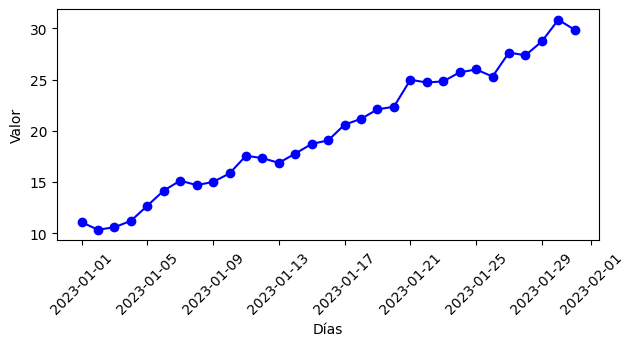

In [134]:
# Definimos el tamaño del gráfico
plt.figure(figsize=(7, 3))

# Creamos el gráfico
plt.plot(enero_df.Fecha, enero_df.Valor, marker='o', linestyle='-', color='blue')

# Rotamos las etiquetas del eje x
plt.xticks(rotation=45)

# Etiquetas y título
plt.xlabel('Días')
plt.ylabel('Valor')

# Mostramos el gráfico
plt.show()

In [135]:
# Añadimos algunos valores missing
# para testear las distintas técnicas

# Escogemos dos índices aleatorios
idx_rand = [5, 17]

# Sustituímos el valor de esos índices por NaNs
enero_df.loc[idx_rand, 'Valor'] = np.nan

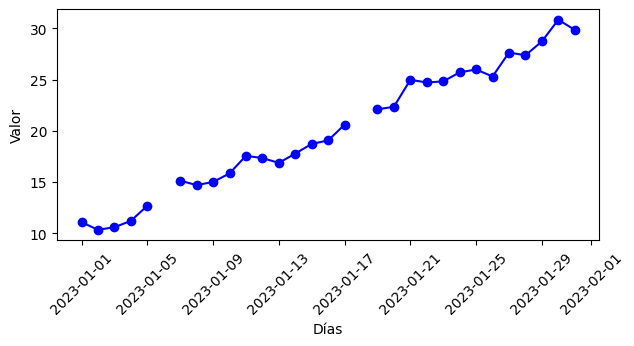

In [136]:
# Definimos el tamaño del gráfico
plt.figure(figsize=(7, 3))

# Creamos el gráfico
plt.plot(enero_df.Fecha, enero_df.Valor, marker='o', linestyle='-', color='blue')

# Rotamos las etiquetas del eje x
plt.xticks(rotation=45)

# Etiquetas y título
plt.xlabel('Días')
plt.ylabel('Valor')

# Mostramos el gráfico
plt.show()

In [137]:
# Primero de todo guardamos una copia del df original con NaNs
enero_NaNs_df = enero_df.copy()

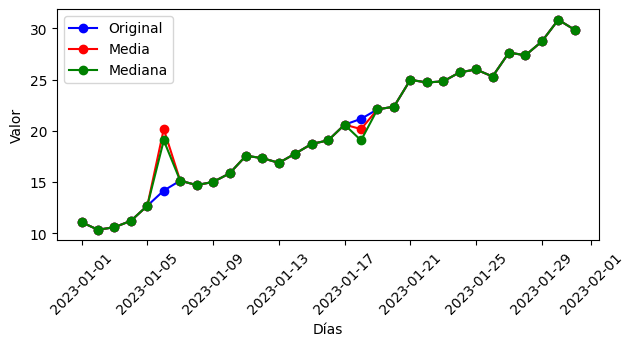

In [138]:
# Ahora vamos a testear las distintas técnicas

# Media & Mediana

# Sustituímos los NaNs por la media/mediana de la columna
enero_mean_df = enero_df.assign(Valor=enero_df.Valor.fillna(enero_df.Valor.mean()))
enero_median_df = enero_df.assign(Valor=enero_df.Valor.fillna(enero_df.Valor.median()))

# Definimos el tamaño del gráfico
plt.figure(figsize=(7, 3))

# Creamos el gráfico
plt.plot(enero_orig_df.Fecha, enero_orig_df.Valor,
         marker='o', linestyle='-', color='blue')
plt.plot(enero_mean_df.Fecha, enero_mean_df.Valor,
         marker='o', linestyle='-', color='red')
plt.plot(enero_median_df.Fecha, enero_median_df.Valor,
         marker='o', linestyle='-', color='green')

# Rotamos las etiquetas del eje x
plt.xticks(rotation=45)

# Etiquetas y título
plt.xlabel('Días')
plt.ylabel('Valor')

# Añadimos la leyenda
plt.legend(["Original", "Media", "Mediana"])

# Mostramos el gráfico
plt.show()



/tmp/ipython-input-1828360019.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  enero_locf_df['Valor']= enero_locf_df['Valor'].fillna(method ='bfill')
/tmp/ipython-input-1828360019.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  enero_nocb_df['Valor']= enero_nocb_df['Valor'].fillna(method ='ffill')


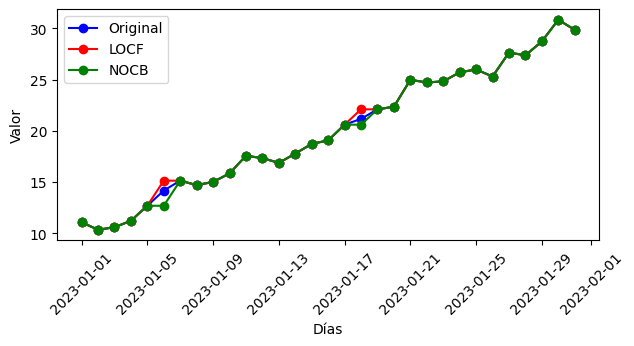

In [139]:

# LOCF & NOCB

# Creamos nuevos df para guardar los resultados
enero_locf_df = enero_df.copy()
enero_nocb_df = enero_df.copy()

# Usamos los métodos LOCF & NOCB
enero_locf_df['Valor']= enero_locf_df['Valor'].fillna(method ='bfill')
enero_nocb_df['Valor']= enero_nocb_df['Valor'].fillna(method ='ffill')

# Definimos el tamaño del gráfico
plt.figure(figsize=(7, 3))

# Creamos el gráfico
plt.plot(enero_orig_df.Fecha, enero_orig_df.Valor,
         marker='o', linestyle='-', color='blue')
plt.plot(enero_locf_df.Fecha, enero_locf_df.Valor,
         marker='o', linestyle='-', color='red')
plt.plot(enero_nocb_df.Fecha, enero_nocb_df.Valor,
         marker='o', linestyle='-', color='green')

# Rotamos las etiquetas del eje x
plt.xticks(rotation=45)

# Etiquetas y título
plt.xlabel('Días')
plt.ylabel('Valor')

# Añadimos la leyenda
plt.legend(["Original", "LOCF", "NOCB"])

# Mostramos el gráfico
plt.show()

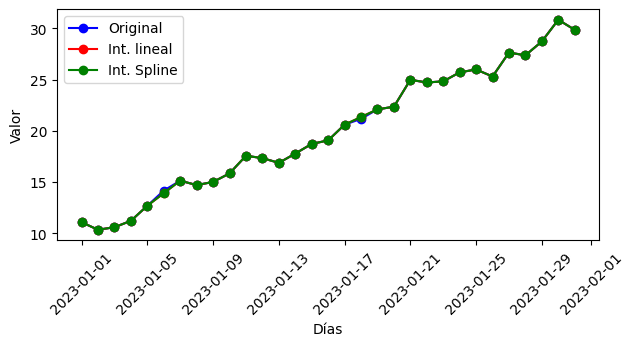

In [140]:

# Interpolación lineal y spline

# Creamos nuevos df para guardar los resultados
enero_int_lin_df = enero_df.copy()
enero_int_spline_df = enero_df.copy()

# Usamos la interpolación lineal y spline
enero_int_lin_df['Valor']= enero_int_lin_df['Valor'].interpolate(method='linear')
enero_int_spline_df['Valor']= enero_int_spline_df['Valor'].interpolate(option='spline')

# Definimos el tamaño del gráfico
plt.figure(figsize=(7, 3))

# Creamos el gráfico
plt.plot(enero_orig_df.Fecha, enero_orig_df.Valor,
         marker='o', linestyle='-', color='blue')
plt.plot(enero_int_lin_df.Fecha, enero_int_lin_df.Valor,
         marker='o', linestyle='-', color='red')
plt.plot(enero_int_spline_df.Fecha, enero_int_spline_df.Valor,
         marker='o', linestyle='-', color='green')

# Rotamos las etiquetas del eje x
plt.xticks(rotation=45)

# Etiquetas y título
plt.xlabel('Días')
plt.ylabel('Valor')

# Añadimos la leyenda
plt.legend(["Original", "Int. lineal", "Int. Spline"])

# Mostramos el gráfico
plt.show()

### 5. Suavizado de series temporales <a name="id5"></a>

El suavizado de series temporales es un proceso que tiene como objetivo reducir el ruido o variabilidad en los datos para mostrar patrones o tendencias más claras. Existen varias técnicas de suavizado, y la elección de una depende de la naturaleza de los datos y del objetivo del análisis.

**Promedio Móvil**

El promedio móvil (en inglés, *rolling window*) calcula el promedio de un conjunto de puntos de datos adyacentes. Puede ser un promedio simple o ponderado.

**Suavizado Exponencial**

El suavizado exponencial (en inglés, *expontential smoothing*) asigna pesos decrecientes exponencialmente a los puntos de datos anteriores. Es útil para capturar tendencias a largo plazo.

**Transformaciones Logarítmicas o Box-Cox**

Aplicar transformaciones como logaritmos puede estabilizar la varianza y suavizar la serie.

**Filtros FIR**

Los filtros FIR (Finite Impulse Response) aplican coeficientes a los datos para suavizar la serie. Pueden ser diseñados para suavizar específicamente frecuencias de interés.

**Spline Cúbico**

Los splines cúbicos interpolan los datos con polinomios cúbicos suaves. Son útiles para suavizar la serie mientras preservan mejor la forma de los datos originales.

In [141]:
# Vamos a ver estas técnicas de suavizado con la serie temporal con ruido

# Definimos el eje temporal
tiempo = np.arange(1, 21)

# Creamos una serie temporal con ruido
st_ruido_alto = np.sin(2 * np.pi * tiempo / 10) + np.random.normal(0, 0.8, size=20)

# Transformamos el array en dataframe para poder usar las funciones
st_ruido_alto_df = pd.DataFrame(st_ruido_alto)

# Aplicamos un promedio móvil simple
serie_suavizada_promedio = st_ruido_alto_df.rolling(window=3).mean()

# Aplicamos un suavizado exponencial
serie_suavizada_exp = st_ruido_alto_df.ewm(span=3, adjust=False).mean()

# Aplicamos una transformación logarítmica
serie_transformada_log = np.log1p(st_ruido_alto_df)


/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


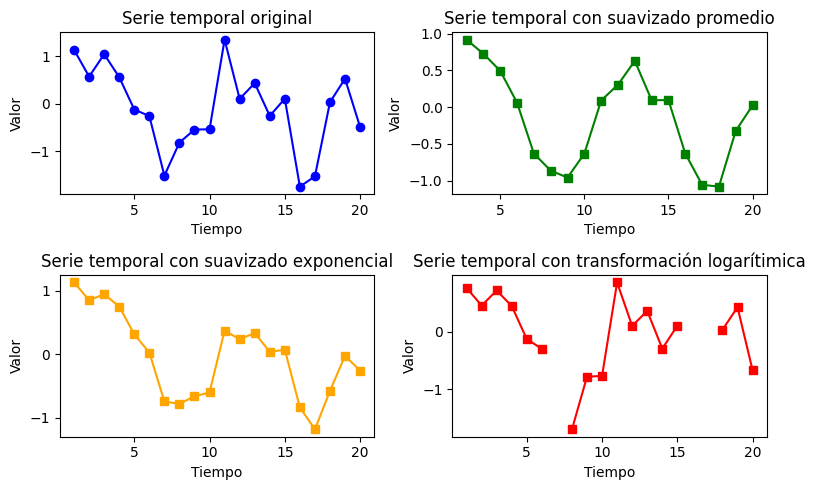

In [142]:
# Creamos subplot con dos líneas
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

# Serie temporal original
axs[0][0].plot(tiempo, st_ruido_alto_df, marker='o', linestyle='-', color='blue')
axs[0][0].set_title('Serie temporal original')
axs[0][0].set_xlabel('Tiempo')
axs[0][0].set_ylabel('Valor')

# Serie temporal con suavizado promedio
axs[0][1].plot(tiempo, serie_suavizada_promedio, marker='s', linestyle='-', color='green')
axs[0][1].set_title('Serie temporal con suavizado promedio')
axs[0][1].set_xlabel('Tiempo')
axs[0][1].set_ylabel('Valor')

# Serie temporal con suavizado exponencial
axs[1][0].plot(tiempo, serie_suavizada_exp, marker='s', linestyle='-', color='orange')
axs[1][0].set_title('Serie temporal con suavizado exponencial')
axs[1][0].set_xlabel('Tiempo')
axs[1][0].set_ylabel('Valor')

# Serie temporal con transformación logarítimica
axs[1][1].plot(tiempo, serie_transformada_log, marker='s', linestyle='-', color='red')
axs[1][1].set_title('Serie temporal con transformación logarítimica')
axs[1][1].set_xlabel('Tiempo')
axs[1][1].set_ylabel('Valor')

# Ajustamos el diseño y mostramos gráfico
plt.tight_layout()
plt.show()

In [143]:
# Cargamos las funciones necesarias
from scipy.signal import firwin, lfilter
from scipy.interpolate import UnivariateSpline

# Aplicamos un filtro FIR
coeficientes_fir = firwin(numtaps=3, cutoff=0.3)
serie_suavizada_fir = lfilter(coeficientes_fir, 1.0, st_ruido_alto_df)

# Aplicamos un spline cúbico
spline = UnivariateSpline(tiempo, st_ruido_alto_df, s=0.1)
serie_suavizada_cub = spline(tiempo)

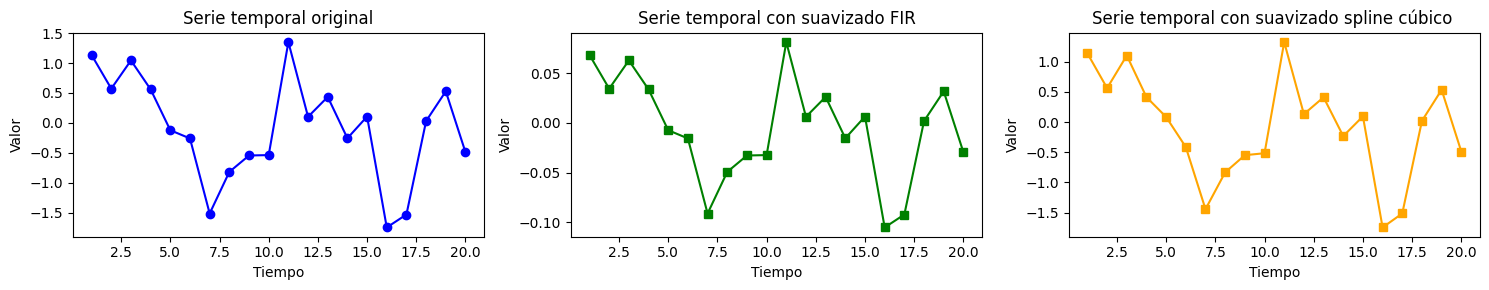

In [144]:
# Creamos subplot con dos líneas
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

# Serie temporal original
axs[0].plot(tiempo, st_ruido_alto_df, marker='o', linestyle='-', color='blue')
axs[0].set_title('Serie temporal original')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Valor')

# Serie temporal con suavizado FIR
axs[1].plot(tiempo, serie_suavizada_fir, marker='s', linestyle='-', color='green')
axs[1].set_title('Serie temporal con suavizado FIR')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Valor')

# Serie temporal con spline cúbico
axs[2].plot(tiempo, serie_suavizada_cub, marker='s', linestyle='-', color='orange')
axs[2].set_title('Serie temporal con suavizado spline cúbico ')
axs[2].set_xlabel('Tiempo')
axs[2].set_ylabel('Valor')

# Ajustamos el diseño y mostramos gráfico
plt.tight_layout()
plt.show()

### Extra: Cómo trabajar con NaNs/valores nulos

In [145]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Creamos fechas para la serie temporal
# que representan los 31 días de Enero
fechas = pd.date_range(start='2025-01-01', periods=31, freq='D')

# Generamos valores con tendencia ascendente
# Valores linealmente crecientes de 10 a 30
# con ruido
valores = np.linspace(10, 30, num=31) + np.random.normal(0, 0.8, size=31)


# Creamos el DataFrame con fechas y valores
enero_df = pd.DataFrame({'Fecha': fechas, 'Valor': valores})

# Mostramos la serie temporal
enero_df.head(5)

,Fecha,Valor
0,2025-01-01,9.799698
1,2025-01-02,10.950497
2,2025-01-03,10.861949
3,2025-01-04,13.552997
4,2025-01-05,11.670632


In [146]:
# Especificamos un nuevo formato
formato_personalizado = "%d$%m$%Y"

# Transformamos las fechas a este nuevo formato
list_dates = enero_df['Fecha']
enero_df['Fecha'] = [date.strftime(formato_personalizado) for date in list_dates]

# Mostramos el nuevo formato de Fecha
enero_df.head(5)

,Fecha,Valor
0,01$01$2025,9.799698
1,02$01$2025,10.950497
2,03$01$2025,10.861949
3,04$01$2025,13.552997
4,05$01$2025,11.670632


In [147]:
enero1_df = enero_df.copy()

# Añadimos NaNs a la fecha
enero1_df.iloc[1, 0] = np.nan

# Mostramos el df
enero1_df.head(5)


,Fecha,Valor
0,01$01$2025,9.799698
1,NaN,10.950497
2,03$01$2025,10.861949
3,04$01$2025,13.552997
4,05$01$2025,11.670632


In [148]:
## Opción 1
# Podemos transformar las fechas al formato correcto sin problemas
enero1_df['Fecha'] = pd.to_datetime(enero1_df['Fecha'], format="%d$%m$%Y")
enero1_df.head(5)


,Fecha,Valor
0,2025-01-01,9.799698
1,NaT,10.950497
2,2025-01-03,10.861949
3,2025-01-04,13.552997
4,2025-01-05,11.670632


In [149]:
enero1_df = enero_df.copy()

# Añadimos NaNs a la fecha
enero1_df.iloc[1, 0] = np.nan

# Mostramos el df
enero1_df.head(5)

,Fecha,Valor
0,01$01$2025,9.799698
1,NaN,10.950497
2,03$01$2025,10.861949
3,04$01$2025,13.552997
4,05$01$2025,11.670632


In [150]:
## Opción 2

# Seleccionamos las filas que no son NaNs
idx_dates = enero1_df[~enero1_df.Fecha.isna()].index

# Aplicamos la transformación solo en esas filas
enero1_df.loc[idx_dates, 'Fecha'] = pd.to_datetime(enero1_df.loc[idx_dates, 'Fecha'], format="%d$%m$%Y")

# Mostramos el df
enero1_df.head(5)

,Fecha,Valor
0,2025-01-01 00:00:00,9.799698
1,NaN,10.950497
2,2025-01-03 00:00:00,10.861949
3,2025-01-04 00:00:00,13.552997
4,2025-01-05 00:00:00,11.670632


In [151]:
enero2_df = enero_df.copy()

# Añadimos un string a la fecha
enero2_df.iloc[2, 0] = "IDK"

# Mostramos el df
enero2_df.head(5)

,Fecha,Valor
0,01$01$2025,9.799698
1,02$01$2025,10.950497
2,IDK,10.861949
3,04$01$2025,13.552997
4,05$01$2025,11.670632


In [152]:
# Podemos transformar ahora las fechas al formato correcto?
try:
  enero2_df['Fecha'] = pd.to_datetime(enero2_df['Fecha'], format="%d$%m$%Y")
  enero2_df.head(5)
except ValueError as e:
  print("[ERROR] ¡No se puede transformar!")
  print(str(e))

[ERROR] ¡No se puede transformar!
time data "IDK" doesn't match format "%d$%m$%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [153]:
## Opcion 1
# Seleccionamos las filas que no tienen el valor IDK
idx_dates = enero2_df[enero2_df.Fecha!='IDK'].index

# Transformamos las filas que no son IDK
enero2_df.loc[idx_dates, 'Fecha'] = pd.to_datetime(enero2_df.loc[idx_dates, 'Fecha'], format="%d$%m$%Y")

# Mostramos el df
enero2_df.head(5)


,Fecha,Valor
0,2025-01-01 00:00:00,9.799698
1,2025-01-02 00:00:00,10.950497
2,IDK,10.861949
3,2025-01-04 00:00:00,13.552997
4,2025-01-05 00:00:00,11.670632


In [154]:
enero2_df = enero_df.copy()

# Añadimos un string a la fecha
enero2_df.iloc[2, 0] = "IDK"

# Mostramos el df
enero2_df.head(5)

,Fecha,Valor
0,01$01$2025,9.799698
1,02$01$2025,10.950497
2,IDK,10.861949
3,04$01$2025,13.552997
4,05$01$2025,11.670632


In [155]:
## Opcion 2
# Seleccionamos las filas que no tienen el valor IDK
enero2_df.Fecha = enero2_df.Fecha.replace('IDK', np.nan)

# Ahora podemos transformar las fechas al formato correcto sin problemas
enero2_df['Fecha'] = pd.to_datetime(enero2_df['Fecha'], format="%d$%m$%Y")

# Mostramos el df
enero2_df.head(5)

,Fecha,Valor
0,2025-01-01,9.799698
1,2025-01-02,10.950497
2,NaT,10.861949
3,2025-01-04,13.552997
4,2025-01-05,11.670632
